## Plot Cruise Maps

- python>=3.6
- using cartopy (basemap is deprecated)

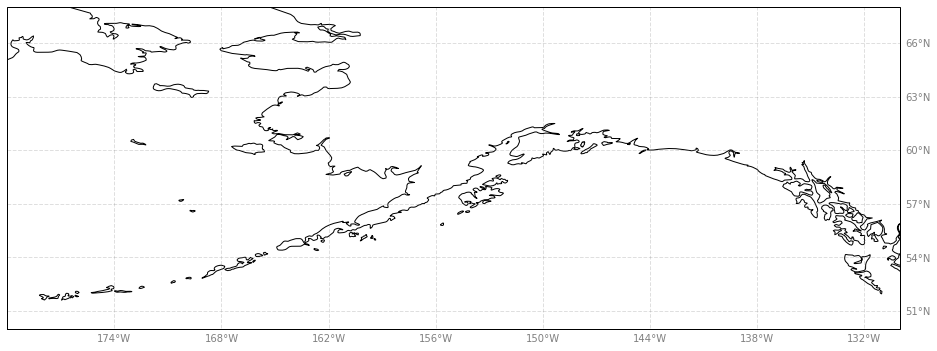

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(16, 16),
                           subplot_kw=dict(projection=projection))
    if (projection == ccrs.PlateCarree()) or (projection == ccrs.Mercator()):
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=1., color='gray', alpha=0.25, linestyle='--')
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 10, 'color': 'gray'}
        gl.xlabel_style = {'size': 10, 'color': 'gray'}
    return fig, ax

projection=ccrs.LambertConformal(central_longitude=-160.0)
projection=ccrs.Mercator()
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

dx = dy = 0.5
extent = [-180, -130, 50, 66]
fig,ax = make_map(projection=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

### Pull bathymetry from erddap

In [38]:
#using xarray for data read
import xarray as xa
import cmocean

server_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSS111'
bathy = xa.open_dataset(server_url) 

bathy_sub = bathy.sel(latitude=slice(76,66),longitude=slice(-174,-150))

In [39]:
bathy_sub

<xarray.Dataset>
Dimensions:    (latitude: 1887, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 75.999374 75.995346 ... 66.008766 66.00198
  * longitude  (longitude) float32 -173.99167 -173.975 ... -150.025 -150.00833
Data variables:
    topo       (latitude, longitude) int16 ...
Attributes:
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.6, ACDD-1.3
    creator_email:              jjbecker@ucsd.edu, dsandwell@ucsd.edu
    Easternmost_Easting:        179.9917
    geospatial_lat_max:         80.738
    geospatial_lat_min:         -80.738
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         179.9917
    geospatial_lon_min:         -179.9917
    geospatial_lon_resolution:  0.016666669753229318
    geospatial_lon_units:       degrees_east
    history:                    28-Apr-2008: Converted to NetCDF using gdal_t...
    infoUrl:                    ftp://topex.ucsd.edu/pub/global_topo_1min
    institution:        

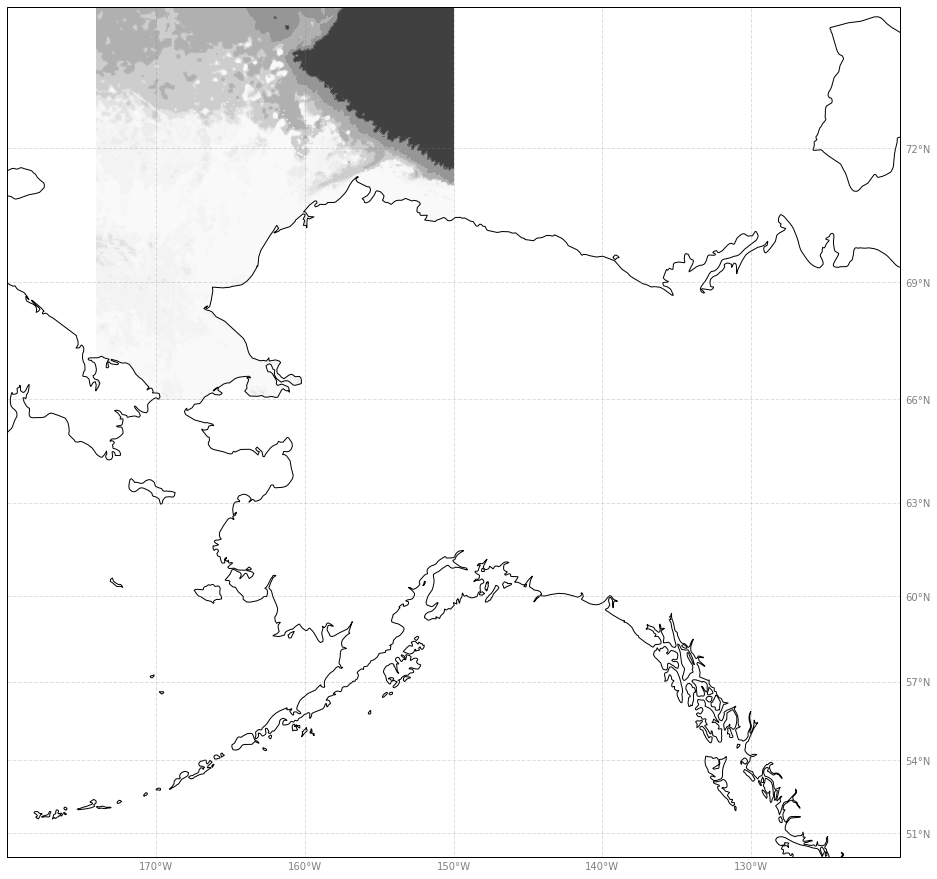

In [40]:
dx = dy = 0.5
extent = [-180, -120, 50, 72.5]
fig,ax = make_map(projection=projection)

#ax.plot(df['longitude'], df['latitude'], 'b', label=alamo, transform=transformation)
#ax.plot(df['longitude'], df['latitude'], '+k', markersize=1, label=alamo, transform=transformation)
#ax.pcolormesh(bathy_sub.longitude, bathy_sub.latitude, bathy_sub.topo, cmap=cmocean.cm.deep_r,
#         transform=transformation)
ax.contourf(bathy_sub.longitude, bathy_sub.latitude, bathy_sub.topo, 
            levels=[-2000, -1000, -200, -100, -70, -50,], 
            colors=('#000000','#737373','#969696','#bdbdbd','#d9d9d9','#f0f0f0','#f8f8f8'), 
            extend='both', alpha=.75,
            transform=transformation)
#leg = ax.legend(bbox_to_anchor=(1.45,1), loc='upper right')

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

In [4]:
fig.savefig('FOCI_Bathy.png',dpi=300)

In [5]:
### Add data from excel
import pandas as pd

path = 'data/'
mooringdata = pd.read_excel(path + 'mooringdeploymentlogs.xlsx','Moorings')
ctddata = pd.read_excel(path + 'mooringdeploymentlogs.xlsx','CTD')
cruisedata = pd.read_excel(path + 'mooringdeploymentlogs.xlsx','Cruises')


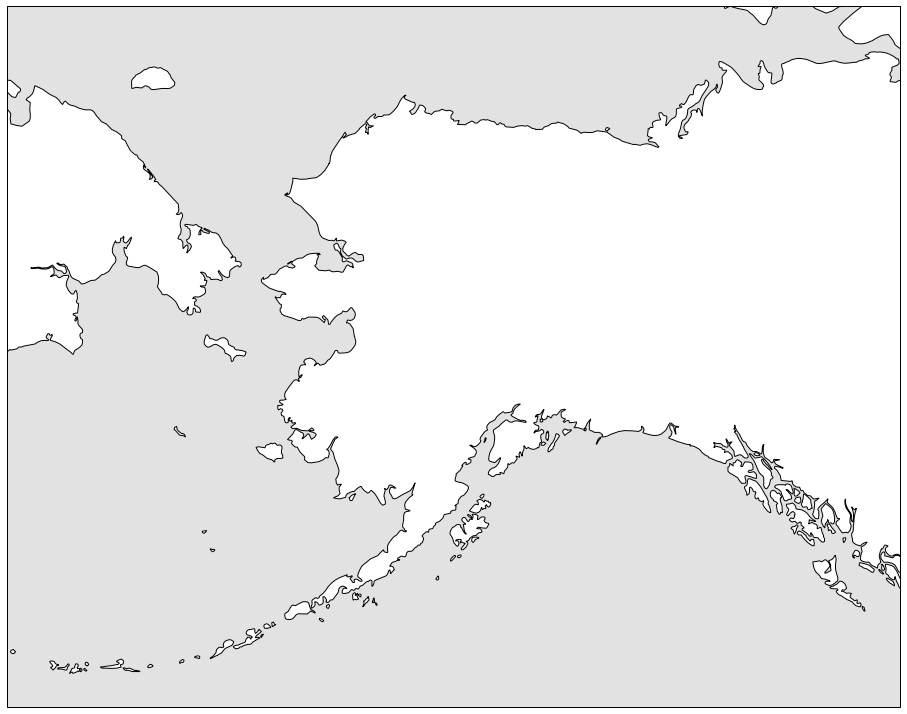

In [6]:
dx = dy = 0.5
extent = [-180, -130, 50, 72.5]
fig,ax = make_map(projection=projection)

#ax.plot(df['longitude'], df['latitude'], 'b', label=alamo, transform=transformation)
#ax.plot(df['longitude'], df['latitude'], '+k', markersize=1, label=alamo, transform=transformation)
#ax.pcolormesh(bathy_sub.longitude, bathy_sub.latitude, bathy_sub.topo, cmap=cmocean.cm.deep_r,
#         transform=transformation)
ax.contourf(bathy_sub.longitude, bathy_sub.latitude, bathy_sub.topo, 
            levels=[-1000, -200, -100, -70, -50,], 
            colors=('#737373','#969696','#bdbdbd','#d9d9d9','#f0f0f0','#f8f8f8'), 
            extend='both', alpha=.75,
            transform=transformation)
#leg = ax.legend(bbox_to_anchor=(1.45,1), loc='upper right')

ax.scatter(cruisedata.LonDD, cruisedata.LatDD, s=2, color='black', marker='o',
                               transform=transformation)
ax.scatter(ctddata.LonDD, ctddata.LatDD, s=2, color='grey', marker='o',
                               transform=transformation)
ax.scatter(mooringdata.LonDD, mooringdata.LatDD, s=2, color='red', marker='o',
                               transform=transformation)
ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

In [50]:
fig.savefig('FOCI_Bathy_AllMoorings_Cruises_and_IconicLines.png',dpi=300)